### Extract WER from log

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
LOG_FILE = "log1000.txt"

#### Estrazione WER

In [7]:
SINGLE_STEPS = 50

epoch_list = []
wer_list = []

TIMESTAMP_LENGTH = 22

with open(LOG_FILE, encoding='utf-8') as file:
    for line in file:
        
        if "eval_wer" in line:
            # need some preprocessing on the lines
            line = line.strip()
            line = line.replace("'", '"')
            
            # remove the timestamp (first chars)
            line = line[TIMESTAMP_LENGTH:]
            
            try:
                print(line)
                json_data = json.loads(line)
                
                epoch_list.append(json_data['epoch'])
                wer_list.append(json_data['eval_wer'])
            except:
                print(f"This line can't be processed: {line}")
                
# steps
steps_list = [SINGLE_STEPS * (i + 1) for i in range(len(wer_list))]

{"eval_loss": 0.9045917391777039, "eval_wer": 0.5461465271170314, "eval_runtime": 30.1434, "eval_samples_per_second": 1.825, "eval_steps_per_second": 0.133, "epoch": 3.17}
{"eval_loss": 0.5140445232391357, "eval_wer": 0.28068506184586106, "eval_runtime": 28.8836, "eval_samples_per_second": 1.904, "eval_steps_per_second": 0.138, "epoch": 6.35}
{"eval_loss": 0.5870081782341003, "eval_wer": 0.1665080875356803, "eval_runtime": 17.6157, "eval_samples_per_second": 3.122, "eval_steps_per_second": 0.227, "epoch": 9.52}


In [8]:
dict_res = {
    "steps": steps_list,
    "epochs": epoch_list,
    "wer": wer_list}

df_res = pd.DataFrame(dict_res)

df_res.head(30)

,steps,epochs,wer
0,50,3.17,0.546147
1,100,6.35,0.280685
2,150,9.52,0.166508


#### Plot the results

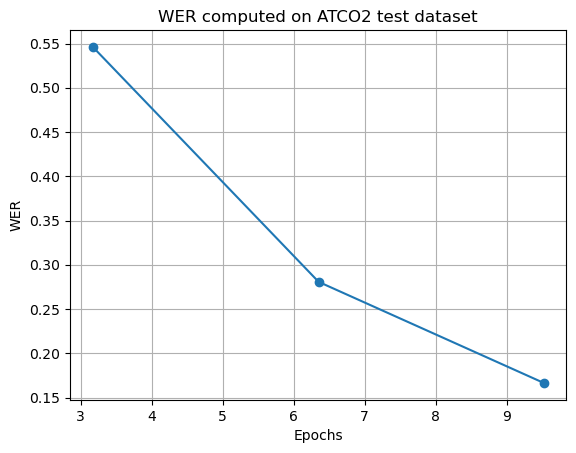

In [9]:
plt.plot(epoch_list, wer_list, marker='o')
plt.title("WER computed on ATCO2 test dataset")
plt.xlabel("Epochs")
plt.ylabel("WER")
plt.grid(True);

In [ ]:
steps_list